<a href="https://colab.research.google.com/github/yusufsahin/python-training-maro/blob/main/ders11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#1)Data
iris=load_iris()
X_all=iris.data #[sepal length, sepal width, petal length, petal width]
feature_names=iris.feature_names

#2)Hedef : petal length (index=2)
y=X_all[:,2]

#3)Girişler: petal length hariç 3 feature
X = np.delete(X_all, 2, axis=1)  # remove column 2

print("X columns:", [n for i, n in enumerate(feature_names) if i != 2])
print("y column :", feature_names[2])

# 4) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Model

model = LinearRegression()
model.fit(X_train, y_train)

# 6) Predict + Evaluate
pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred) # Removed squared=False
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, pred)

print("MAE :", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("R2  :", round(r2, 4))

# 7) Katsayılar (yorumlanabilirlik)
print("\nIntercept (b):", model.intercept_)
for name, coef in zip([n for i, n in enumerate(feature_names) if i != 2], model.coef_):
    print(f"{name:15s} -> {coef:.4f}")

X columns: ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']
y column : petal length (cm)
MAE : 0.2605
RMSE: 0.3606
R2  : 0.9603

Intercept (b): -0.26219590258870396
sepal length (cm) -> 0.7228
sepal width (cm) -> -0.6358
petal width (cm) -> 1.4675


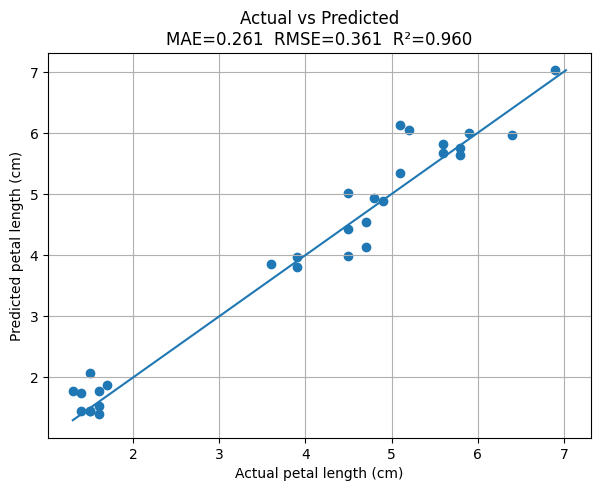

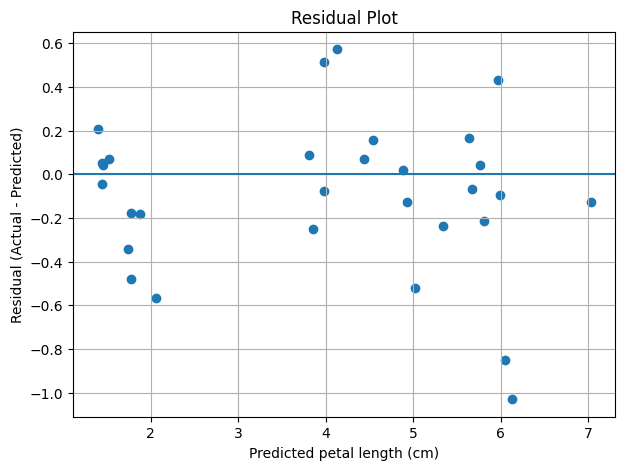

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Veri
iris = load_iris()
X_all = iris.data  # [sepal length, sepal width, petal length, petal width]
feature_names = iris.feature_names

# 2) Hedef: petal length (index=2)
y = X_all[:, 2]

# 3) Girdiler: petal length hariç 3 feature
X = np.delete(X_all, 2, axis=1)

# 4) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6) Tahmin
pred = model.predict(X_test)

# 7) Metrikler
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred) # Removed squared=False
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, pred)

# -------------------------
# PLOT 1: Actual vs Predicted
# -------------------------
plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred)
plt.xlabel("Actual petal length (cm)")
plt.ylabel("Predicted petal length (cm)")
plt.title(f"Actual vs Predicted\nMAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")

# Referans çizgisi: y = x
minv = min(y_test.min(), pred.min())
maxv = max(y_test.max(), pred.max())
plt.plot([minv, maxv], [minv, maxv])
plt.grid(True)
plt.show()

# -------------------------
# PLOT 2: Residual Plot
# -------------------------
residuals = y_test - pred
plt.figure(figsize=(7, 5))
plt.scatter(pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted petal length (cm)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()